# Problem 4: Object Detection via YOLO
---
**Robotics and Mechatronics - MP4** | *Group 11*

## Installations and Imports

In [4]:
!pip install roboflow
!pip install ultralytics

In [5]:
# Import the necessary libraries
from roboflow import Roboflow
from ultralytics import YOLO
from google.colab import drive
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image
import math
import torch
import cv2
import os
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Initializations
Here we connect the program to Roboflow API and introduce a dataset. We also initialize the YOLO model.

In [10]:
rf = Roboflow(api_key="yF0KU3OVCK23xxBX1pWX")
project = rf.workspace("proj-sfl83").project("grasp-6")
version = project.version(7)
dataset = version.download("yolov8")

# Initialize the YOLO model
model = YOLO('yolov8n')

# Verify installation by printing the model architecture or some details
print(model)

# Verify dataset import
print(dataset)

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.55, to fix: `pip install ultralytics==8.0.196`
YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): C

## Train and Save Model
Since we have limited GPU access, we train the model on GPU once and save the results in Google Drive. Afterwards, we can switch to CPU and use the saved model weights.

In [ ]:
# Check the path to the dataset
dataset_path = dataset.location
print(f"Dataset downloaded to: {dataset_path}")

# Define the path where you want to save the results
save_dir = '/content/drive/My Drive/YOLOv8_training'

# Step 5: Train the model
data_yaml_path = f"{dataset_path}/data.yaml"
model.train(data=data_yaml_path, epochs=50, batch=16, imgsz=640, project=save_dir, name='exp-1', patience=20, device='cuda', optimizer='Adam')


Dataset downloaded to: /content/grasp-6-7
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/grasp-6-7/data.yaml, epochs=50, time=None, patience=20, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=/content/drive/My Drive/YOLOv8_training, name=exp-13, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=F

100%|██████████| 755k/755k [00:00<00:00, 22.0MB/s]


Overriding model.yaml nc=80 with nc=19

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 93.9MB/s]
Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)


AMP: checks passed ✅


train: Scanning /content/grasp-6-7/train/labels... 2517 images, 3 backgrounds, 0 corrupt: 100%|██████████| 2517/2517 [00:01<00:00, 1636.97it/s]

train: New cache created: /content/grasp-6-7/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 8697, len(boxes) = 8784. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/grasp-6-7/valid/labels... 212 images, 0 backgrounds, 0 corrupt: 100%|██████████| 212/212 [00:00<00:00, 979.64it/s] 

val: New cache created: /content/grasp-6-7/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 579, len(boxes) = 620. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to /content/drive/My Drive/YOLOv8_training/exp-13/labels.jpg... 
optimizer: Adam(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/drive/My Drive/YOLOv8_training/exp-13
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.58G        1.3      2.576      1.384         33        640: 100%|██████████| 158/158 [01:07<00:00,  2.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   0%|          | 0/7 [00:00<?, ?it/s]Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:12<00:00,  1.82s/it]

                   all        212        620     0.0252      0.173     0.0224      0.012



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50       2.4G      1.355      2.169      1.449         44        640: 100%|██████████| 158/158 [00:59<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.54it/s]


                   all        212        620      0.293      0.324      0.144      0.101

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.38G      1.287      1.962      1.409         17        640: 100%|██████████| 158/158 [01:05<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        212        620      0.159      0.604      0.282      0.196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.39G      1.224      1.781      1.366         21        640: 100%|██████████| 158/158 [01:01<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]


                   all        212        620      0.527      0.412      0.432      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.37G       1.18      1.704      1.344         40        640: 100%|██████████| 158/158 [01:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]


                   all        212        620      0.512      0.513      0.454      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.39G      1.126      1.557      1.309         22        640: 100%|██████████| 158/158 [01:04<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        212        620      0.493      0.565      0.517      0.398



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.37G        1.1       1.49      1.288         51        640: 100%|██████████| 158/158 [00:58<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]

                   all        212        620      0.451      0.588      0.505      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.39G      1.074      1.452      1.285         27        640: 100%|██████████| 158/158 [00:58<00:00,  2.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]

                   all        212        620      0.567      0.476      0.498      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.22G      1.067        1.4      1.266         32        640: 100%|██████████| 158/158 [01:03<00:00,  2.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]

                   all        212        620      0.682      0.601      0.613      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.39G      1.041      1.353      1.264         33        640: 100%|██████████| 158/158 [00:57<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        212        620      0.578      0.641      0.682      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.38G      1.022      1.301      1.242         22        640: 100%|██████████| 158/158 [00:58<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]


                   all        212        620      0.573      0.595      0.593      0.454

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.39G     0.9977      1.211      1.224         22        640: 100%|██████████| 158/158 [01:00<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        212        620      0.634       0.71      0.696      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.39G      0.989      1.215      1.224         39        640: 100%|██████████| 158/158 [00:59<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        212        620      0.728      0.662       0.71      0.582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.39G     0.9823       1.17      1.222         36        640: 100%|██████████| 158/158 [00:59<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        212        620      0.601      0.633       0.64      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.37G     0.9503      1.115      1.201         37        640: 100%|██████████| 158/158 [01:02<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        212        620      0.708      0.768      0.759      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.22G     0.9543      1.108      1.202         26        640: 100%|██████████| 158/158 [00:56<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        212        620      0.796      0.695      0.785      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.37G     0.9693      1.122      1.218         48        640: 100%|██████████| 158/158 [00:57<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        212        620      0.742      0.687      0.805      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.24G     0.9288       1.05      1.181         28        640: 100%|██████████| 158/158 [01:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]

                   all        212        620       0.64      0.704      0.741      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.36G     0.9164      1.044      1.181         19        640: 100%|██████████| 158/158 [00:59<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        212        620       0.81      0.679      0.794      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.39G     0.8996      1.025      1.171         32        640: 100%|██████████| 158/158 [00:57<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]


                   all        212        620      0.677      0.718       0.75       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.37G     0.9005     0.9878      1.171         27        640: 100%|██████████| 158/158 [01:00<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.21it/s]

                   all        212        620      0.784      0.689      0.814      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.39G     0.8951      0.985      1.169         16        640: 100%|██████████| 158/158 [00:57<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        212        620      0.692       0.71      0.714      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.23G     0.8909     0.9664      1.172         26        640: 100%|██████████| 158/158 [00:58<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        212        620      0.796      0.678       0.74      0.605



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.38G     0.8918     0.9685      1.168         41        640: 100%|██████████| 158/158 [01:01<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.55it/s]

                   all        212        620      0.667       0.77      0.752       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.21G     0.8754     0.9368       1.16         51        640: 100%|██████████| 158/158 [00:56<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        212        620      0.751       0.73      0.766      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.39G     0.8615     0.9075       1.15         29        640: 100%|██████████| 158/158 [00:57<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.88it/s]

                   all        212        620      0.839      0.713       0.82       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.37G     0.8467     0.8938      1.145         28        640: 100%|██████████| 158/158 [00:58<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.63it/s]

                   all        212        620      0.747      0.825      0.844      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.23G     0.8397     0.8702      1.133         48        640: 100%|██████████| 158/158 [00:58<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.29it/s]


                   all        212        620      0.732      0.768      0.807      0.681

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.23G     0.8441      0.888       1.14         51        640: 100%|██████████| 158/158 [00:57<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        212        620      0.749      0.708       0.79      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.39G     0.8431     0.8653      1.138         36        640: 100%|██████████| 158/158 [00:55<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.24it/s]

                   all        212        620      0.744      0.793      0.823      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.37G     0.8228     0.8484      1.127         16        640: 100%|██████████| 158/158 [01:01<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.98it/s]

                   all        212        620      0.766      0.722      0.794       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.37G     0.8199     0.8292      1.125         32        640: 100%|██████████| 158/158 [00:57<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        212        620      0.775      0.785      0.815      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.37G     0.8276     0.8123      1.131         40        640: 100%|██████████| 158/158 [00:58<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        212        620       0.78      0.761      0.793       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.37G     0.8025     0.7923      1.113         28        640: 100%|██████████| 158/158 [01:00<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        212        620       0.77      0.785      0.843      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.36G     0.8104     0.7937      1.123         23        640: 100%|██████████| 158/158 [00:57<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        212        620      0.842      0.736      0.862      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.22G     0.8021     0.7905      1.118         30        640: 100%|██████████| 158/158 [00:55<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.75it/s]

                   all        212        620      0.814      0.702      0.821      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.38G     0.7984     0.7704      1.113         41        640: 100%|██████████| 158/158 [01:01<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.41it/s]

                   all        212        620      0.773      0.807      0.838      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.39G     0.7866     0.7505      1.106         18        640: 100%|██████████| 158/158 [00:56<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]

                   all        212        620      0.775       0.82       0.87       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.37G     0.7783     0.7308      1.099         25        640: 100%|██████████| 158/158 [00:57<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        212        620      0.808      0.834      0.861      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.37G     0.7727     0.7244      1.098         23        640: 100%|██████████| 158/158 [01:01<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.83it/s]

                   all        212        620      0.832      0.813      0.911      0.771


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.49G     0.6538     0.5963      1.037         14        640: 100%|██████████| 158/158 [00:57<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.99it/s]

                   all        212        620      0.864        0.8      0.842      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.39G     0.6361     0.5516      1.029         17        640: 100%|██████████| 158/158 [00:53<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.26it/s]

                   all        212        620      0.864       0.84       0.91      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.37G     0.6291     0.5351      1.021         14        640: 100%|██████████| 158/158 [00:56<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.34it/s]


                   all        212        620      0.878      0.814      0.906      0.769

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.37G     0.6068     0.5059      1.008         33        640: 100%|██████████| 158/158 [00:57<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        212        620      0.895      0.826      0.903      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.37G     0.6032     0.4938      1.002         28        640: 100%|██████████| 158/158 [00:55<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.30it/s]


                   all        212        620      0.867      0.805      0.897      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.37G        0.6     0.4847      1.001         20        640: 100%|██████████| 158/158 [00:59<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.19it/s]

                   all        212        620      0.882      0.823      0.916      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.37G     0.5834     0.4651     0.9902         13        640: 100%|██████████| 158/158 [00:53<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]

                   all        212        620      0.882      0.795      0.912      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.38G     0.5718     0.4502     0.9783         21        640: 100%|██████████| 158/158 [00:51<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        212        620      0.881      0.796      0.892      0.776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.37G      0.561     0.4392     0.9757         20        640: 100%|██████████| 158/158 [00:54<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        212        620      0.878      0.799      0.914      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.37G     0.5543     0.4286     0.9744         26        640: 100%|██████████| 158/158 [00:56<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]

                   all        212        620      0.867      0.796       0.91      0.795



50 epochs completed in 0.876 hours.
Optimizer stripped from /content/drive/My Drive/YOLOv8_training/exp-13/weights/last.pt, 6.3MB
Optimizer stripped from /content/drive/My Drive/YOLOv8_training/exp-13/weights/best.pt, 6.3MB

Validating /content/drive/My Drive/YOLOv8_training/exp-13/weights/best.pt...
Ultralytics YOLOv8.2.54 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3009353 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]


                   all        212        620      0.878      0.799      0.914      0.796
                banana         36         72      0.972      0.956       0.98      0.913
               biscuit          5          8      0.655          1      0.839      0.652
                  cake          5          8      0.399          1      0.919       0.87
           cup-laying-          4          8      0.836      0.875      0.926      0.867
         cup-standing-          5          8      0.896       0.75      0.967      0.876
                  fork          6         12      0.892      0.688      0.957      0.745
         juice-laying-          7         13      0.689          1       0.99      0.917
       juice-standing-         14         31      0.774          1      0.995      0.889
                 knife          3          5          1      0.501      0.928      0.796
                  logo         37         37      0.836      0.828      0.819       0.67
               nescaf

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a2d8ec6a9b0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,

## Import Model
We can import the model once it has been trained and saved in Google Drive.

In [11]:
save_dir = '/content/drive/My Drive/YOLOv8_training'
model_path = os.path.join(save_dir, 'exp-13/weights/best.pt')

# Load the pre-trained model
model = YOLO(model_path)

# Verify the model
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

## Import Test Images

In [12]:
# Define the path to the shared folder
shared_folder_path = f'/content/drive/My Drive/MP4/MP4/test images'

# List the contents of the shared folder
print(os.listdir(shared_folder_path))
test_images = []

for image in os.listdir(shared_folder_path):
    image_path = os.path.join(shared_folder_path, image)
    test_images.append(image_path)

results = model.predict(test_images)  # Predict on the test images

['IMG_E1392.JPG', 'IMG_E1367.JPG', 'IMG_E1370.JPG', 'IMG_E1342.JPG', 'IMG_E1397.JPG', 'IMG_3236.JPG', 'IMG_3243.JPG', 'IMG_1246.JPG', 'IMG_3025.JPG', 'WIN_20230917_13_32_27_Pro.jpg']

0: 640x640 2 cakes, 222.9ms
1: 640x640 1 knife, 222.9ms
2: 640x640 1 straw, 222.9ms
3: 640x640 2 spoons, 222.9ms
4: 640x640 2 cakes, 222.9ms
5: 640x640 4 knifes, 222.9ms
6: 640x640 2 spoons, 222.9ms
7: 640x640 2 juice-laying-s, 1 logo, 222.9ms
8: 640x640 1 juice-laying-, 1 juice-standing-, 1 logo, 1 rani-laying-, 1 rani-standing-, 222.9ms
9: 640x640 2 bananas, 2 tangerines, 222.9ms
Speed: 5.6ms preprocess, 222.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)


## Display Test Images and Model Prediction Results


0: 576x640 2 cakes, 317.9ms
Speed: 6.1ms preprocess, 317.9ms inference, 2.3ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 1 knife, 306.7ms
Speed: 5.5ms preprocess, 306.7ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 1 straw, 301.0ms
Speed: 5.7ms preprocess, 301.0ms inference, 1.3ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 2 spoons, 315.1ms
Speed: 5.6ms preprocess, 315.1ms inference, 1.4ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 2 cakes, 191.8ms
Speed: 4.4ms preprocess, 191.8ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 1 fork, 4 knifes, 183.6ms
Speed: 4.1ms preprocess, 183.6ms inference, 1.0ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 2 spoons, 215.8ms
Speed: 4.1ms preprocess, 215.8ms inference, 0.9ms postprocess per image at shape (1, 3, 576, 640)

0: 576x640 2 juice-laying-s, 1 logo, 191.1ms
Speed: 4.1ms preprocess, 191.1ms inference, 1.0ms post

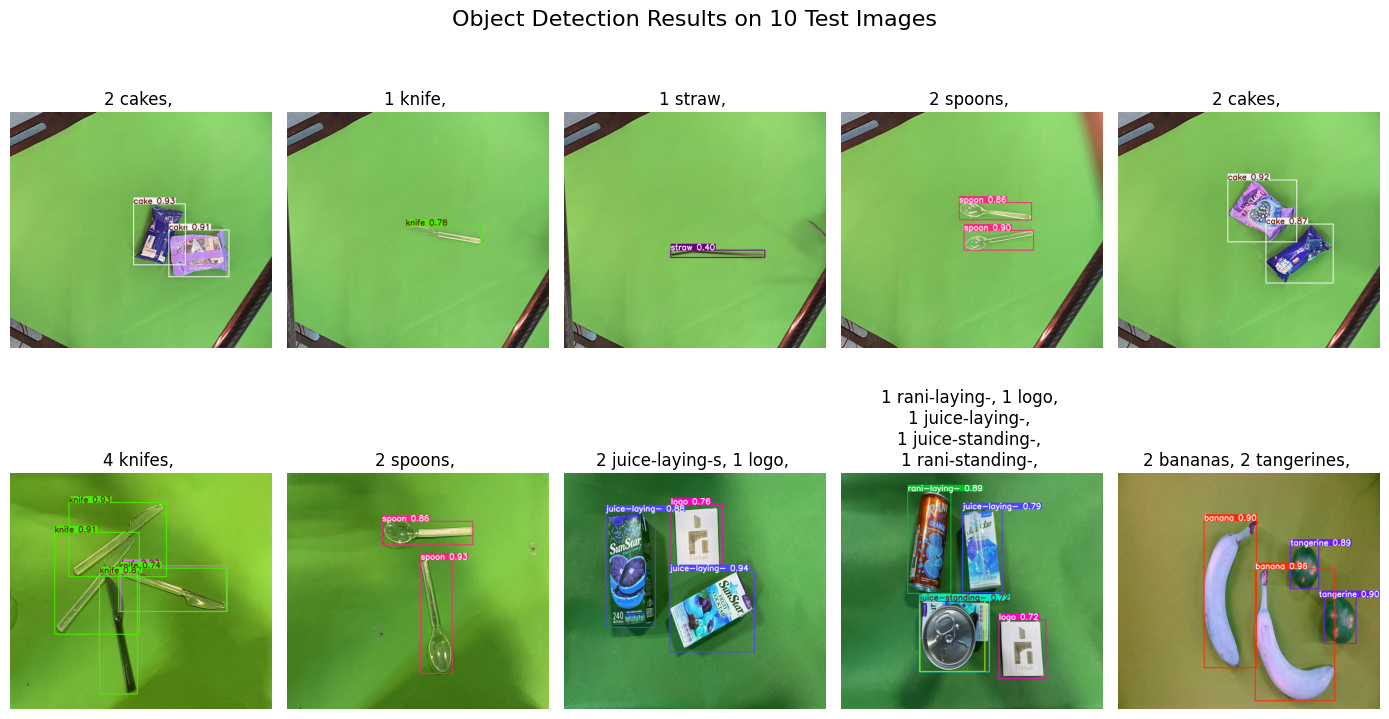

In [16]:
num_imgs = len(test_images)
num_cols = 5  # Number of images per row
num_rows = math.ceil(num_imgs / num_cols)

new_width, new_height = 2000, 1800  # Set desired dimensions

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 8))  # Adjust figsize as needed

# Adjust wspace and hspace to control spacing between subplots
plt.subplots_adjust(wspace=0, hspace=0)

fig.suptitle('Object Detection Results on 10 Test Images', fontsize=16)

# Display images
for i, image_path in enumerate(test_images):
    row = i // num_cols
    col = i % num_cols
    img = Image.open(image_path)
    img = img.resize((new_width, new_height))
    res = model(img)
    axes[row, col].imshow(res[0].plot())
    axes[row, col].axis('off')  # Turn off axis labels

    # Counter to store the count of each class
    class_counts = Counter()
    text = ''
    result = results[i]
    for box in result.boxes:
        label = int(box.cls.item())  # Convert the tensor to an integer
        class_name = model.names[label]  # Get the class name from the label
        class_counts[class_name] += 1  # Increment the count for this class

    t = 0
    for class_name, count in class_counts.items():
        if t > 1:
            text += '\n'
        text += f"{count} {class_name}{'s' if count > 1 else ''}, "
        t += 1

    # Add a label below the image
    axes[row, col].set_title(text)

# Hide any unused subplots
for i in range(num_imgs, num_rows * num_cols):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

## Show Confidence Number for Model Predictions

In [9]:
print("Object Detection Results on 10 Test Images")
# Iterate through each result corresponding to each image
for i, result in enumerate(results):
    print(f"Image {i+1}:")

    # Extract the labels and confidence scores for each detected object in the image
    for box in result.boxes:
        label = int(box.cls.item())  # Convert the tensor to an integer
        confidence = box.conf.item()  # Convert the tensor to a float

        # Convert the class index to a label name
        class_name = model.names[label]

        print(f"  Detected {class_name} with confidence {confidence:.2f}")


Object Detection Results on 10 Test Images
Image 1:
  Detected cake with confidence 0.93
  Detected cake with confidence 0.92
Image 2:
  Detected knife with confidence 0.82
Image 3:
  Detected straw with confidence 0.52
Image 4:
  Detected spoon with confidence 0.91
  Detected spoon with confidence 0.87
Image 5:
  Detected cake with confidence 0.92
  Detected cake with confidence 0.91
Image 6:
  Detected knife with confidence 0.93
  Detected knife with confidence 0.93
  Detected knife with confidence 0.82
  Detected knife with confidence 0.64
Image 7:
  Detected spoon with confidence 0.91
  Detected spoon with confidence 0.70
Image 8:
  Detected juice-laying- with confidence 0.94
  Detected juice-laying- with confidence 0.80
  Detected logo with confidence 0.80
Image 9:
  Detected rani-laying- with confidence 0.88
  Detected logo with confidence 0.87
  Detected juice-laying- with confidence 0.83
  Detected juice-standing- with confidence 0.61
  Detected rani-standing- with confidence 0

## Save Model Predictions
In the next problem, we're going to need the resulting predictions of YOLO model on the provided test images. Thus, we save them in Google Drive for further applications.

In [10]:
box_list = [result.boxes.xyxy for result in results]
box_save = os.path.join(save_dir, 'boxes/box_list.pt')
torch.save(box_list, box_save)

## Display Boundary Boxes More Plainly


0: 640x640 2 cakes, 210.9ms
Speed: 6.4ms preprocess, 210.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


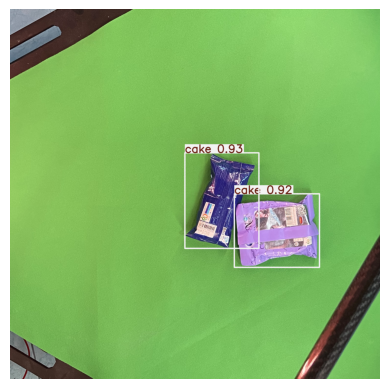


0: 640x640 1 knife, 207.0ms
Speed: 8.4ms preprocess, 207.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


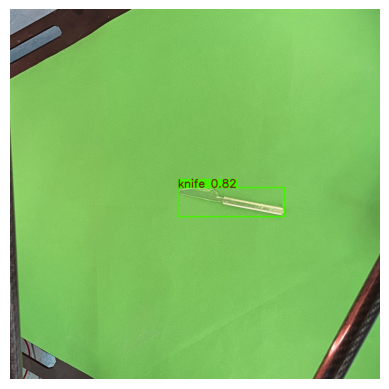


0: 640x640 1 straw, 232.6ms
Speed: 7.2ms preprocess, 232.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


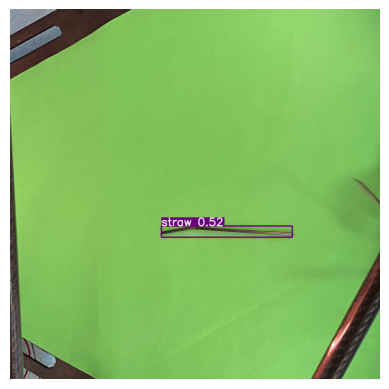


0: 640x640 2 spoons, 218.0ms
Speed: 9.4ms preprocess, 218.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


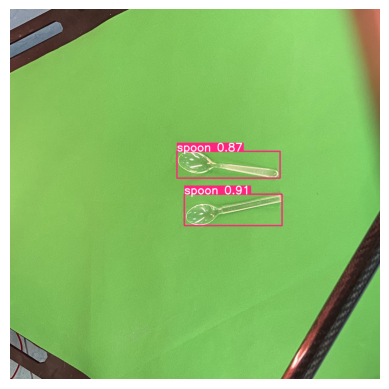


0: 640x640 2 cakes, 224.5ms
Speed: 7.1ms preprocess, 224.5ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


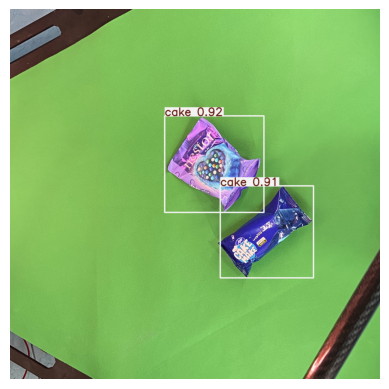


0: 640x480 4 knifes, 161.2ms
Speed: 6.6ms preprocess, 161.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


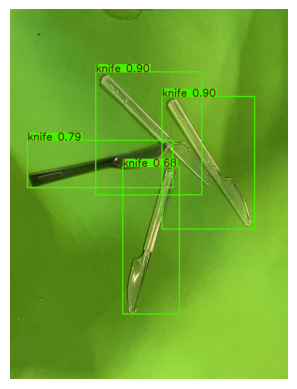


0: 640x480 2 spoons, 249.7ms
Speed: 5.1ms preprocess, 249.7ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 480)


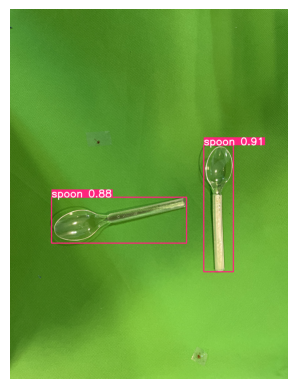


0: 640x480 2 juice-laying-s, 3 logos, 223.1ms
Speed: 5.1ms preprocess, 223.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


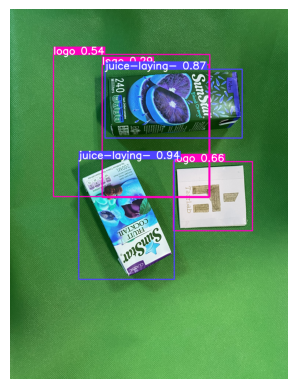


0: 640x480 1 juice-laying-, 1 juice-standing-, 1 logo, 1 rani-laying-, 1 rani-standing-, 167.8ms
Speed: 6.2ms preprocess, 167.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


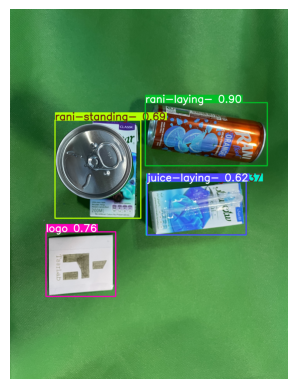


0: 384x640 2 bananas, 2 tangerines, 164.4ms
Speed: 3.5ms preprocess, 164.4ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


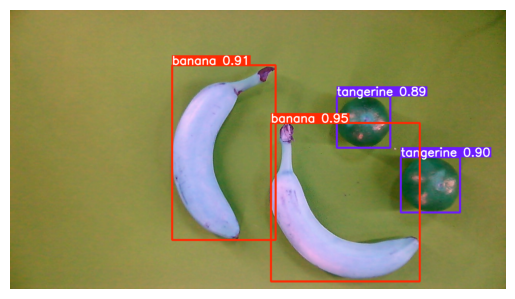

In [13]:
for image_path in test_images:
    img = cv2.imread(image_path)
    result = model(img)
    plt.imshow(result[0].plot())
    plt.axis('off')
    plt.show()